In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
import pandas as pd
sentiment = pd.read_csv('sentiment.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler  
transfer = MinMaxScaler(feature_range=(116,360)) 
data = sentiment.values
data = transfer.fit_transform(data)
score_transfer = pd.DataFrame(data)
sentiment['score_transfer'] = score_transfer[8]

In [4]:
sentiment

,Unnamed: 0,Year,number,extreme_positive,positive,neutral,negative,extreme_negative,sentiment score,score_transfer
0,0,2009,489,7,77,315,54,36,-35,132.354328
1,1,2010,2573,58,443,1695,293,84,98,143.284608
2,2,2011,9640,183,1591,6250,1295,321,20,136.874368
3,3,2012,26446,61,5028,16712,4002,643,-138,123.889525
4,4,2013,43000,0,9019,26424,7000,557,905,209.605928
5,5,2014,60542,0,14020,35341,11077,104,2735,360.000000
6,6,2015,60746,0,13686,35997,10365,698,1925,293.432132
7,7,2016,45494,269,8533,27817,8530,345,-149,122.985517
8,8,2017,32838,277,5772,21145,4728,916,-234,116.000000
9,9,2018,30686,0,6386,18427,5323,550,-37,132.189963


In [5]:
sentiment.sort_values(by=['score_transfer'], ascending=True)

,Unnamed: 0,Year,number,extreme_positive,positive,neutral,negative,extreme_negative,sentiment score,score_transfer
8,8,2017,32838,277,5772,21145,4728,916,-234,116.000000
7,7,2016,45494,269,8533,27817,8530,345,-149,122.985517
3,3,2012,26446,61,5028,16712,4002,643,-138,123.889525
9,9,2018,30686,0,6386,18427,5323,550,-37,132.189963
0,0,2009,489,7,77,315,54,36,-35,132.354328
2,2,2011,9640,183,1591,6250,1295,321,20,136.874368
1,1,2010,2573,58,443,1695,293,84,98,143.284608
12,12,2021,11101,0,2308,7212,1262,319,408,168.761199
10,10,2019,26587,0,5769,15863,4861,94,720,194.402156
4,4,2013,43000,0,9019,26424,7000,557,905,209.605928


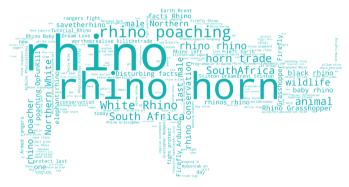

In [30]:
#content-related
text = open('rhino_2017.txt','r').read()
stopwords = set(STOPWORDS)

#Apperance-related
def color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
        h  = 180  #2019: 0 60 38；2013: 0 75 38 2020: 0 78 38； 2015: 0 84 38 2014: 0 99 38
                        #2009: 180 14 38；#2018：180 22 38；2012: 180 50 38 2016: 180 60 38； 2017 180 84 38
        s = 84
        l = 38
        return "hsl({}, {}%, {}%)".format(h, s, l)

custom_mask = np.array(Image.open('rhinobigg.png'))

wc = WordCloud(background_color = 'white',max_font_size = 800,
              mask = custom_mask,color_func = color_func) #,color_func = color_func
wc.generate(text)

#image_colors = ImageColorGenerator(custom_mask)
#wc.recolor(color_func = (255,242,0))


plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

#wc.to_file('rhino_wordcloud.png')

In [31]:
wc.to_file('2017.png')